# Enunciado
Em outras palavras, nossas amostras serão **pontos no plano cartesiano**. Para
verificar a separabilidade dos dados, o método deverá computar as **envoltórias convexas de cada classe** (será assumido que os dados possuem apenas dois rótulos para simplificar). Em seguida, deverá ser verificado se há ou não **sobreposição dessas classes/envoltórias através do algoritmo de varredura linear** para verificação de interseção de segmentos. Caso não haja interseção entre segmentos de envoltórias distintas, então os dados são linearmente separáveis.

Para gerar os **modelos lineares**, o algoritmo utilizará as envoltórias convexas computadas na etapa anterior. O algoritmo deve encontrar os **pontos mais próximos entre as duas envoltórias**. O modelo a ser reportado será a reta perpendicular ao segmento que une esses dois pontos e que passa sobre seu ponto médio. O modelo a ser reportado é a **equação dessa reta**.

O **classificador** deve operar da seguinte forma: o modelo atribui o **mesmo rótulo a uma nova amostra que os pontos da envoltória que se localizam na mesma região**. Isto é, se um ponto estiver abaixo/à esquerda da reta gerada pelo modelo, então ele receberá o mesmo rótulo que os pontos da envoltória dessa região.

#   Convex Hull


In [ ]:
import matplotlib.pyplot as plt
import random
from math import atan2

def create_hull(points):
    def cross_product(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    if len(points) < 3:
        return points

    pivot = min(points, key=lambda p: (p[1], p[0]))
    sorted_points = sorted(points, key=lambda p: (atan2(p[1] - pivot[1], p[0] - pivot[0]), p))

    hull = [sorted_points[0], sorted_points[1]]

    for i in range(2, len(sorted_points)):
        while len(hull) > 1 and cross_product(hull[-2], hull[-1], sorted_points[i]) <= 0:
            hull.pop()
        hull.append(sorted_points[i])

    return hull

# Gerar pontos aleatórios
random.seed()  # Não definir uma semente para obter pontos realmente aleatórios
num_points = 50
points = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_points)]

# Calcular o Convex Hull
convex_hull = create_hull(points)

# Separar os pontos x e y do Convex Hull
ch_x, ch_y = zip(*convex_hull)
x, y = zip(*points)

# Criar um gráfico para visualizar os pontos e o Convex Hull
plt.scatter(x, y, label='Pontos')
plt.plot(ch_x + (ch_x[0],), ch_y + (ch_y[0],), 'r-', label='Convex Hull')
plt.legend()
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Convex Hull com Pontos Aleatórios')
plt.grid(True)
plt.show()


# Interseção de Envoltórias + Convex Hull

YES


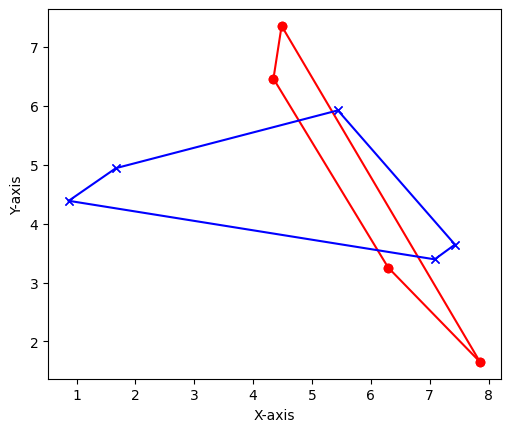

In [422]:
import matplotlib.pyplot as plt
import random
from math import atan2
from sortedcontainers import SortedList

class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, other):
        # Comparação para ordenar pontos com base nas coordenadas x e y
        if self.x < other.x:
            return True
        elif self.x == other.x:
            return self.y < other.y
        else:
            return False

class Segment:
    def __init__(self, start, end):
        self.start = start
        self.end = end

def direction(p0, p1, p2):
    return (p1.x - p0.x) * (p2.y - p0.y) - (p2.x - p0.x) * (p1.y - p0.y)

def on_segment(p0, p1, p2):
    if min(p0.x, p1.x) <= p2.x <= max(p0.x, p1.x) and min(p0.y, p1.y) <= p2.y <= max(p0.y, p1.y):
        return True
    return False

def segments_intersect(seg1, seg2):
    p0, p1 = seg1.start, seg1.end
    p2, p3 = seg2.start, seg2.end

    d1 = direction(p2, p3, p0)
    d2 = direction(p2, p3, p1)
    d3 = direction(p0, p1, p2)
    d4 = direction(p0, p1, p3)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    elif d1 == 0 and on_segment(p2, p3, p0):
        return False
    elif d2 == 0 and on_segment(p2, p3, p1):
        return False
    elif d3 == 0 and on_segment(p0, p1, p2):
        return False
    elif d4 == 0 and on_segment(p0, p1, p3):
        return False
    else:
        return False

def above(T, s):
    index = T.index(s)
    if index > 0:
        return T[index - 1]
    return None

def below(T, s):
    index = T.index(s)
    if index < len(T) - 1:
        return T[index + 1]
    return None

def segments_intersect_hull(set1, set2):
    T = SortedList(key=lambda s: (s.start.x, not s.start, s.start.y))

    for seg in set1:
        p1, p2 = seg.start, seg.end

        if not p1:
            continue

        T.add(seg)
        above_seg = above(T, seg)
        below_seg = below(T, seg)

        if any(segments_intersect(seg2, seg) for seg2 in set2):
            return True  # Intersection found, exit early

        if not p2:
            T.discard(seg)

    return False

def create_hull(points):
    def cross_product(o, a, b):
        return (a.x - o.x) * (b.y - o.y) - (a.y - o.y) * (b.x - o.x)

    if len(points) < 3:
        return points

    pivot = min(points, key=lambda p: (p.y, p.x))  # Corrigir o acesso aos atributos .x e .y
    sorted_points = sorted(points, key=lambda p: (atan2(p.y - pivot.y, p.x - pivot.x), p))

    hull = [sorted_points[0], sorted_points[1]]

    for i in range(2, len(sorted_points)):
        while len(hull) > 1 and cross_product(hull[-2], hull[-1], sorted_points[i]) <= 0:
            hull.pop()
        hull.append(sorted_points[i])

    return hull

def hullSegments(convex_hull):
    segments = []
    for i in range(len(convex_hull) - 1):
        segments.append(Segment(convex_hull[i], convex_hull[i + 1]))
    segments.append(Segment(convex_hull[-1], convex_hull[0]))
    return segments

def generate_random_points(num_points):
    points = [Ponto(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(num_points)]
    return points

def main():
    # points1 = [Ponto(0, 3), Ponto(0, 2), Ponto(1, 1), Ponto(2, 2), Ponto(1, 2)]
    # points2 = [Ponto(1, 4), Ponto(1, 3), Ponto(3, 2), Ponto(3, 4), Ponto(2, 3)]

    # Número de pontos aleatórios em cada conjunto
    num_points = 5
    points1 = generate_random_points(num_points)
    points2 = generate_random_points(num_points)

    # Calcular o Convex Hull para ambos os conjuntos
    convex_hull1 = create_hull(points1)
    convex_hull2 = create_hull(points2)

    # Calcular os segmentos da envoltória convexa para ambos os Convex Hull
    segments1 = hullSegments(convex_hull1)
    segments2 = hullSegments(convex_hull2)

    result = segments_intersect_hull(segments1, segments2)

    if result:
        print("YES")
    else:
        print("NO")

    # Crie uma nova figura e eixo
    fig, ax = plt.subplots()

    # Itere pelos segmentos do primeiro conjunto e plote-os com uma cor (por exemplo, vermelho)
    for i, segment in enumerate(segments1):
        (x1, y1), (x2, y2) = (segment.start.x, segment.start.y), (segment.end.x, segment.end.y)
        ax.plot([x1, x2], [y1, y2], marker='o', label=f"Conjunto 1 - Segmento {i+1}", color='red')

    # Itere pelos segmentos do segundo conjunto e plote-os com outra cor (por exemplo, azul)
    for i, segment in enumerate(segments2):
        (x1, y1), (x2, y2) = (segment.start.x, segment.start.y), (segment.end.x, segment.end.y)
        ax.plot([x1, x2], [y1, y2], marker='x', label=f"Conjunto 2 - Segmento {i+1}", color='blue')

    # Defina os rótulos dos eixos
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # Defina a proporção de aspecto como igual
    ax.set_aspect('equal')

    # Mostrar o gráfico
    plt.show()

if __name__ == "__main__":
    main()

# Reta perpendicular

In [ ]:
def perpendicular_equation(segment):
    start = segment.start
    end = segment.end

    # Calcula o ponto médio
    midpoint_x = (end.x + start.x) / 2
    midpoint_y = (end.y + start.y) / 2

    # Calcula o declive do segmento
    if start.x != end.x:
        slope = (end.y - start.y) / (end.x - start.x)
    else:
        slope = float('inf')

    # Calcula o declive da reta perpendicular
    if slope == 0:
        perpendicular_slope = float('inf')  # Reta horizontal
    else:
        perpendicular_slope = -1 / slope

    # Calcula o termo independente (b) da equação da reta perpendicular
    intercept = midpoint_y - perpendicular_slope * midpoint_x

    return perpendicular_slope, intercept

# ------------------------------------------------------------------------------

def plot_segments(segment):
    # Obter a equação da reta perpendicular
    perpendicular_slope, intercept = perpendicular_equation(segment)

    # Coordenadas do segmento
    x_coords = [segment.start.x, segment.end.x]
    y_coords = [segment.start.y, segment.end.y]

    # Coordenadas para a reta perpendicular
    x_perpendicular = [segment.start.x, segment.end.x]
    y_perpendicular = [perpendicular_slope * x + intercept for x in x_perpendicular]

    # Defina limites do gráfico para garantir o crescimento proporcional
    x_min = min(x_coords + x_perpendicular) - 1
    x_max = max(x_coords + x_perpendicular) + 1
    y_min = min(y_coords + y_perpendicular) - 1
    y_max = max(y_coords + y_perpendicular) + 1

    # Plotar o segmento e a reta perpendicular
    plt.plot(x_coords, y_coords, label='Segmento Original')
    plt.plot(x_perpendicular, y_perpendicular, label='Reta Perpendicular', linestyle='--')

    # Marcadores para os pontos finais do segmento
    plt.scatter([segment.start.x, segment.end.x], [segment.start.y, segment.end.y], color='red', marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# ------------------------------------------------------------------------------

p1 = Ponto(2, 3)
p2 = Ponto(5, 8)
segmento = Segment(p1, p2)

perpendicular_slope, intercept = perpendicular_equation(segmento)
print(f"Equação da reta perpendicular: y = {perpendicular_slope}x + {intercept}")

plot_segments(segmento)


In [ ]:
# verificar se ponto está acima ou abaixo
# https://math.stackexchange.com/questions/1683384
def vertical_orientation(slope, intercept, point):
    value = (slope * point.x) + intercept

    if (point.y > value):
      orientation = 1
    elif (point.y < value):
      orientation = -1
    else:
      orientation = 0

    return orientation

# ------------------------------------------------------------------------------
point1 = Ponto(1, 1)
point2 = Ponto(3.5, 5.5)
point3 = Ponto(4, 7)

print(vertical_orientation(perpendicular_slope, intercept, point1))
print(vertical_orientation(perpendicular_slope, intercept, point2))
print(vertical_orientation(perpendicular_slope, intercept, point3))

# Nova leitura dataset

In [420]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# ------------------------------------------------------------------------------

def preprocess_pca_with_split(dataset_url, test_size=0.3, random_state=12):
    # Leitura do dataset
    # data = pd.read_csv(dataset_url, delimiter="\t")  # Adicionei o parâmetro "delimiter" para arquivos tab-delimited
    data = pd.read_csv(dataset_url)

    # Seleção das colunas de atributos (excluindo a coluna alvo)
    attribute_columns = data.columns[:-1]

    # Pré-processamento: padronização (média zero, variância um)
    scaler = StandardScaler()
    data[attribute_columns] = scaler.fit_transform(data[attribute_columns])

    # Separação dos dados em treinamento e teste
    x = data[attribute_columns]
    y = data.iloc[:, -1]  # A coluna alvo (última coluna) é a classe
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Aplicação do PCA para redução de dimensionalidade para 2 componentes
    pca = PCA(n_components=2)
    reduced_train_data = pca.fit_transform(x_train)
    reduced_test_data = pca.transform(x_test)

    print(x_train)

    return reduced_train_data, y_train, reduced_test_data, y_test

# ------------------------------------------------------------------------------

def condense_dataset(data):
  # Identify the target column (last column)
  target_column = data.columns[-1]

  # Separate features (X) and target (y)
  X = data.drop(columns=[target_column])
  y = data[target_column]

  # Initialize the TruncatedSVD model with 2 components (2 dimensions)
  svd = TruncatedSVD(n_components=2)

  # Fit and transform the data into a bidimensional representation
  transformed_data = svd.fit_transform(X)

  # Create a new DataFrame that includes the two-dimensional columns and the classification
  result = pd.DataFrame({'Dimension 1': transformed_data[:, 0], 'Dimension 2': transformed_data[:, 1], 'Class': y})

  return result

# ------------------------------------------------------------------------------

def simplify_classification(dataset, true_classification):

  def convert_classification(classification):
    if classification == true_classification:
        return 1
    else:
        return 0

  dataset['Class'] = dataset['Class'].apply(convert_classification)

  return dataset

# ------------------------------------------------------------------------------

def load_dataset(url, default_classification, attribute_x = 'Dimension 1', attribute_y = 'Dimension 2', attribute_target = 'Class'):
    data = pd.read_csv(url)

    # print(data)

    # filter classification
    data = simplify_classification(data, default_classification)

    # print(data)

    # filtrar para manter apenas as duas primeiras classes alvo na ordem de leitura
    data = condense_dataset(data)

    # print(data)

    # embaralha conjunto de dados com seed 12 (aniversário sasa)
    data = data.sample(frac=1, random_state=12).reset_index(drop=True)

    # print(data)

    # divide o conjunto de dados em treinamento (70%) e teste (30%)
    train_size = int(0.7 * len(data))
    x_train = data.loc[:train_size - 1, [attribute_x, attribute_y]]
    y_train = data.loc[:train_size - 1, attribute_target]
    x_test = data.loc[train_size:, [attribute_x, attribute_y]]
    y_test = data.loc[train_size:, attribute_target]

    # preenche o dataset
    dataset = {
        "x_train": x_train,
        "y_train": y_train,
        "x_test": x_test,
        "y_test": y_test
    }

    return dataset

# ------------------------------------------------------------------------------

# Load the dataset
dataset_url = "https://media.githubusercontent.com/media/Mereep/keel_csv/master/standard_classification/onehot/iris.prepared.csv"
default_classification = "Iris-setosa"

load_dataset(dataset_url, default_classification)

# print(data)

{'x_train':      Dimension 1  Dimension 2
 0      -2.075358    -0.691917
 1       3.309141    -0.002361
 2      -1.871707    -2.327692
 3       2.267555     1.921443
 4       0.662126    -0.224346
 ..           ...          ...
 100     1.884252     0.414333
 101    -2.188676    -0.448629
 102    -0.124697    -2.658063
 103     1.153190    -0.701326
 104     1.171905    -0.318897
 
 [105 rows x 2 columns],
 'y_train': 0      1
 1      0
 2      1
 3      0
 4      0
       ..
 100    0
 101    1
 102    0
 103    0
 104    0
 Name: Class, Length: 105, dtype: int64,
 'x_test':      Dimension 1  Dimension 2
 105    -2.286527     0.467992
 106    -2.205954     0.032238
 107     0.973915    -0.571174
 108     1.227988    -0.940915
 109     0.873537     0.250709
 110     2.001691     1.048550
 111    -2.070537     1.518549
 112     0.717165    -0.185434
 113     2.303006     0.409517
 114    -2.140306     0.336640
 115     0.275425    -1.329816
 116    -0.457013    -1.539465
 117     1.2539

# Trabalho Prático 1
Universidade Federal de Minas Gerais, 2023.

Trabalho sobre Geometria Computacional apresentado para a disciplina Algoritmos 2.

**Nome:** Brisa do Nascimento Barbosa

**Matricula:**

**Nome:** Mateus Krause Eleotério

**Matricula:**

**Nome:** Henrique Matos de Vasconcellos

**Matricula:**



## Introdução
Neste trabalho, nos dedicamos ao desenvolvimento de um algoritmo de aprendizado supervisionado destinado à criação de um modelo de classificação. Esse modelo tem como objetivo atribuir rótulos a amostras desconhecidas com base nas características extraídas de um conjunto de treinamento. A premissa fundamental é a de que, ao entender as características principais das amostras: de treinamento com diferentes rótulos, nosso algoritmo será capaz de generalizar e fazer previsões precisas para novos dados.

Para isso, debruçamos sobre a revisão e aplicação prática de algoritmos geométricos previamente estudados em aula. Dentre eles. Com eles, explicitamos a abordagem implementada:

Dado um conjunto de dados bidimensional com duas classes, exploramos
* Determinar a envoltória convexa das classes, e, com isso, verificar se são linearmente separáveis (se há ou não interseção entre elas)
* Definir um modelo de classificação, que traça uma reta perpedicular ao segmento mínimo entre as classes, e, com isso, determina a qual classe cada ponto pertence a partir da divisão da reta perpendicular
* Avaliação de desempenho do classificador utilizando métricas: precisão, revocação e f1-escore.



## Base


Bases

### Bibliotecas

O código utiliza as bibliotecas matplotlib, math, pandas, e numpy. O matplotlib é uma biblioteca visual que nos auxilia na visualização dos gráficos. Da biblioteca math, usamos atan2 para cálculo de ângulo polar. Pandas é utilizado para importar, manipular e analisar dados tabulares. Por fim, o scikit-learn para computação de métricas.

In [378]:
import matplotlib.pyplot as plt
from math import atan2
import pandas as pd

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

### Classes

Encapsulamos os objetos geométricos em três classes: Point, Segment e Reta.
* Point:

  A classe Point simplemente armazena as coordenadas x e y de um ponto. O atributo segment pode ser utilizado para rastrear a qual segmento o ponto pertence (se pertence à algum).
* Segment:

  Define os segmentos pelo ponto de início 'start' e o ponto final 'end'. Inclui também um atributo opcional, que é a envoltória 'hull' que o pertence (se pertence à alguma). Caso um segmento seja vertical, alteramos ligeiramente sua coordenada x a fim de evitar casos indesejados na varredura linear. Além disso, são fornecidos métodos que calculam o ponto médio do segmento, a equação da reta que passa pelo segmento e o 'find_y', que encontra um x de acordo a equação e um y passado por parâmetro.

* Reta:

  Representa uma reta pelo seu declive e interseção, isto é, de acordo a forma geral de uma equação de reta no plano, y = m*x + a\, em que m é o seu declive e b a interseção com o eixo y.


In [379]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.segment = None

    def __lt__(self, other):
        # compara para ordenar pontos com base nas coordenadas x, usando y como desempate
        if self.x < other.x:
            return True
        elif self.x == other.x:
            return self.y < other.y
        else:
            return False

class Segment:
    def __init__(self, start, end, hull = None):
        if start.x == end.x: #evitar retas verticais na varredura
            start.x += 0.0001

        if start.x > end.x:
            start, end = end, start

        self.start = start
        self.end = end
        self.start.segment = self  # Atribui o segmento ao ponto de início
        self.end.segment = self  # Atribui o segmento ao ponto final

        self.hull = hull  # Armazena uma referência ao conjunto

    @property
    def mid_point(self):
        x_mid = (self.start.x + self.end.x) / 2
        y_mid = (self.start.y + self.end.y) / 2
        return Point(x_mid, y_mid)

    @property
    def equation(self):
        m = (self.end.y - self.start.y) / (self.end.x - self.start.x)
        b = self.start.y - m * self.start.x
        return m, b

    def find_y(self, x):
        m, b = self.equation
        y = m * x + b
        return y

class Reta:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept

    def equation(self):
        return f'y = {self.slope}x + {self.intercept}'

### Extração do DataSet

In [380]:
# Carrega o dataset informado, tratando as entradas e retornando tudo limpo
def load_dataset(url, default_classification, attribute_x='Dimension 1', attribute_y='Dimension 2'):
    data = pd.read_csv(url)

    # Obtém o nome da coluna alvo
    attribute_target = data.columns[-1]

    # Filtra a classificação
    data = simplify_classification(data, default_classification, attribute_target)

    # Filtra para manter apenas as duas primeiras classes alvo na ordem de leitura
    data = condense_dataset(data)

    # Atributo alvo padrão após a condensação
    attribute_target = 'Class'

    # Embaralha o conjunto de dados com seed 12 (aniversário Sasa)
    data = data.sample(frac=1, random_state=12).reset_index(drop=True)

    # print(data)
    # print("aa")

    # Divide o conjunto de dados em treinamento (70%) e teste (30%)
    train_size = int(0.7 * len(data))
    x_train = data.loc[:train_size - 1, [attribute_x, attribute_y]]
    y_train = data.loc[:train_size - 1, attribute_target]
    x_test = data.loc[train_size:, [attribute_x, attribute_y]]
    y_test = data.loc[train_size:, attribute_target]

    # print("aa")

    # Preenche o dataset
    dataset = {
        "x_train": x_train,
        "y_train": y_train,
        "x_test": x_test,
        "y_test": y_test
    }

    # print("aa")

    return dataset

# Obtém dois conjuntos de pontos para cada tipo no target
def split_points_by_classes(x_, y_):
    unique_classes = set(y_)
    if len(unique_classes) != 2:
        raise ValueError("Esta função requer exatamente duas classes no vetor y_.")

    class1, class2 = list(unique_classes)

    points_1 = []
    points_2 = []

    for i, row in x_.iterrows():
        if y_.iloc[i] == class1:
            points_1.append(Point(row['Dimension 1'], row['Dimension 2']))
        else:
            points_2.append(Point(row['Dimension 1'], row['Dimension 2']))

    return points_1, points_2

def condense_dataset(data):
    # Identifica a coluna alvo (última coluna)
    target_column = data.columns[-1]

    # Separa as features (X) e o alvo (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Inicializa o modelo TruncatedSVD com 2 componentes (2 dimensões)
    svd = TruncatedSVD(n_components=2)

    # Ajusta e transforma os dados em uma representação bidimensional
    transformed_data = svd.fit_transform(X)

    # Cria um novo DataFrame que inclui as colunas bidimensionais e a classificação
    result = pd.DataFrame({'Dimension 1': transformed_data[:, 0], 'Dimension 2': transformed_data[:, 1], 'Class': y}) # nomes default, usados como chave depois

    return result

def simplify_classification(dataset, true_classification, attribute_target):

    def convert_classification(classification):
        if classification == true_classification:
            return 1
        else:
            return 0

    dataset[attribute_target] = dataset[attribute_target].apply(convert_classification)

    return dataset


## Algoritmos Geométricos


Geometria *Helpeeerrrs*



In [381]:
def direction(p0, p1, p2):
    return ((p1.x - p0.x)*(p2.y - p0.y) - (p2.x - p0.x)*(p1.y - p0.y))

def distance(p1, p2):
    return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5

def on_segment(p0, p1, p2):
    if min(p0.x, p1.x) <= p2.x <= max(p0.x, p1.x) and min(p0.y, p1.y) <= p2.y <= max(p0.y, p1.y):
        return True
    return False

### Árvore de Segmentos

Utilizada na função que detecta interseção entre envoltórias.

In [382]:
class Node:
    def __init__(self, segment):
        self.segment = segment
        self.left = None
        self.right = None
        self.height = 1 # Altura inicial da árvore é 1

class AVLTree:
    def getHeight(self, node):
        if not node:
            return 0
        return node.height

    def getBalance(self, node):
        if not node:
            return 0
        return self.getHeight(node.left) - self.getHeight(node.right) # Fator de equilíbrio do nó

    def rotateLeft(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))

        return y

    def rotateRight(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))

        return x

    def insert(self, root, segment, x):
        # Insere ordenamente de acordo com a linha de varredura em determinado x
        if not root:
            return Node(segment)

        if segment.find_y(x) < root.segment.find_y(x):
            root.left = self.insert(root.left, segment, x)
        elif segment.find_y(x) > root.segment.find_y(x):
            root.right = self.insert(root.right, segment, x)
        else:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        balance = self.getBalance(root)

        if balance > 1:
            if segment.find_y(x) < root.left.segment.find_y(x):
                return self.rotateRight(root)
            else:
                root.left = self.rotateLeft(root.left)
                return self.rotateRight(root)

        if balance < -1:
            if segment.find_y(x) > root.right.segment.find_y(x):
                return self.rotateLeft(root)
            else:
                root.right = self.rotateRight(root.right)
                return self.rotateLeft(root)

        return root

    def delete(self, root, segment, x):
        # Deleta também de acordo com a linha de varredura em determinado x
        if not root:
            return root

        if segment.find_y(x) < root.segment.find_y(x):
            root.left = self.delete(root.left, segment, x)
        elif segment.find_y(x) > root.segment.find_y(x):
            root.right = self.delete(root.right, segment, x)
        else:
            if (not root.left) or (not root.right):
                temp = root.left if root.right is None else root.right

                if temp is None:
                    temp = root
                    root = None
                else:
                    root = temp

                temp = None
            else:
                temp = self.getMinValueNode(root.right)
                root.segment = temp.segment
                root.right = self.delete(root.right, temp.segment, x)

        if root is None:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        balance = self.getBalance(root)

        if balance > 1:
            if self.getBalance(root.left) >= 0:
                return self.rotateRight(root)
            else:
                root.left = self.rotateLeft(root.left)
                return self.rotateRight(root)

        if balance < -1:
            if self.getBalance(root.right) <= 0:
                return self.rotateLeft(root)
            else:
                root.right = self.rotateRight(root.right)
                return self.rotateLeft(root)

        return root

    def getMinValueNode(self, node):
        if node is None or node.left is None:
            return node

        return self.getMinValueNode(node.left)

    def inOrderReverse(self, root):
        # Impressão opcional da ordem dos segmentos de cima para baixo na linha de varredura
        if root:
            self.inOrderReverse(root.right)
            print(root.segment.number, end=" ")
            self.inOrderReverse(root.left)

    def findPredecessor(self, root, segment, x): # ABAIXO
        if not root:
            return None

        predecessor = None
        while root:
            if segment.find_y(x) > root.segment.find_y(x):
                predecessor = root
                root = root.right
            else:
                root = root.left

        return predecessor

    def findSuccessor(self, root, segment, x): # ACIMA
        if not root:
            return None

        successor = None
        while root:
            if segment.find_y(x) < root.segment.find_y(x):
                successor = root
                root = root.left
            else:
                root = root.right

        return successor

    def swapSegments(self, root, segment1, segment2, x):
        # Basicamente, deleta e insere de novo
        root = self.delete(root, segment1, x)
        root = self.delete(root, segment2, x)

        point1, point2 = segment1.start, segment2.start
        point1.segment, point2.segment = point2, point1
        segment1.start, segment2.start = point2, point1
        point1, point2 = segment1.end, segment2.end
        point1.segment, point2.segment = point2, point1
        segment1.end, segment2.end = point2, point1

        root = self.insert(root, segment1, x)
        root = self.insert(root, segment2, x)

        return root

### Interseções


Aqui, implementamos dois algoritmos de intereseção. Um entre dois segmentos e outro entre segmentos das duas envoltórias. O primeiro é utilizado no segundo.
O algoritmo da interseção de quaisquer 2 segmentos da seguinte forma:

In [383]:
def segments_intersect(seg1, seg2):
    p0, p1 = seg1.start, seg1.end
    p2, p3 = seg2.start, seg2.end

    d1 = direction(p2, p3, p0)
    d2 = direction(p2, p3, p1)
    d3 = direction(p0, p1, p2)
    d4 = direction(p0, p1, p3)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    elif d1 == 0 and on_segment(p2, p3, p0):
        return False
    elif d2 == 0 and on_segment(p2, p3, p1):
        return False
    elif d3 == 0 and on_segment(p0, p1, p2):
        return False
    elif d4 == 0 and on_segment(p0, p1, p3):
        return False
    else:
        return False

Com isso, a função segments_intersect_hull adapta o pseudocódigo descrito em Cormen (coloco como referência bibliográfica?), o qual funciona para um conjunto único de segmentos. No nosso caso, generalizamos para dois conjuntos quaisquer de segmentos. Ainda, foi preferível implementar uma AVL ao invés de utilizar uma árvore vermelho-preta, como sugerido no Cormen, garantem um balanceamento estrito, o que resulta em profundidades de árvore mais uniformes e pela facilidade de implementação neste caso.

O algoritmo que checa interseção entre dois conjuntos de segmentos distintos funciona da seguinte forma:
 abordagem começa por unir todos os segmentos em um único conjunto S, onde os pontos iniciais e finais dos segmentos são armazenados em uma lista ordenada B. Em seguida, a função utiliza uma Árvore AVL para manter um registro dos segmentos enquanto a varredura progride. A varredura percorre os pontos em B e, para cada ponto, verifica se é o ponto de início ou fim de um segmento. Se for um ponto de início, o segmento é inserido na árvore, e as interseções com segmentos adjacentes (abaixo e acima) são verificadas. Se houver interseções, a função verifica se os segmentos pertencem ao mesmo conjunto, se sim e realiza um swap para resolver interseções internas sem alterar a ordem dos segmentos de cima para baixo. Se os segmentos não pertencerem ao mesmo conjunto, encontramos uma interseção válida
 Se um ponto de fim é encontrado, o segmento correspondente é removido da árvore. Testamos então se o segmento abaixo e acima intersectam e verificamos se a interseção é válida ou se realizam um swap assim como definido anteriormente. A função prossegue dessa maneira até que todos os pontos tenham sido processados. Se nenhuma interseção entre os conjuntos de segmentos for encontrada durante a varredura, então não há interseções entre os segmentos.
 Essa abordagem eficiente permite determinar interseções entre segmentos de maneira organizada e escalável. Assim, quando não ocorre interseção,

In [384]:
def segments_intersect_hull(seg1, seg2):
    S = seg1 + seg2
    B = []
    for segment in S:
        B.append(segment.start)
        B.append(segment.end)
    B.sort()

    T = AVLTree()
    root = None

    for point in B:
        s = point.segment
        x = point.x
        if point == (point.segment).start:
            root = T.insert(root, s, x)
            below_seg = T.findPredecessor(root, s, x)
            above_seg = T.findSuccessor(root, s, x)

            if(above_seg is not None):
                if segments_intersect(s, above_seg.segment):
                    if (s.hull == above_seg.segment.hull):
                        root = T.swapSegments(root, s, above_seg.segment, x)
                    else:
                        return True
            if(below_seg is not None):
                if segments_intersect(s, below_seg.segment):
                    if (s.hull == below_seg.segment.hull):
                        root = T.swapSegments(root, s, below_seg.segment, x)
                    else:
                        return True

        else:
            below_seg = T.findPredecessor(root, s, x)
            above_seg = T.findSuccessor(root, s, x)

            if(above_seg is not None and below_seg is not None):
                if segments_intersect(above_seg.segment, below_seg.segment):
                    if (below_seg.segment.hull == above_seg.segment.hull):
                        root = T.swapSegments(root, below_seg.segment, above_seg.segment, x)
                    else:
                        return True
            root = T.delete(root, s, x)

    return False

### Envoltória Convexa

Dentre os algortimos de envoltória convexa vistos no curso, a ver, Marcha de Jarvis e Varredura de Graham, o segundo é mais interessante e mais eficiente, tendo como complexidade O(n log n), contra O(n*h) da Marcha de Jarvis.

Sendo assim, a Varredura de Graham funciona da seguinte forma:

Como esse algoritmo retorna apenas os pontos que fazem parte de uma envoltória, acrescentamos a hull_segments, que retorna os segmentos da envoltória e associa cada segmento a seu um conjunto de segmentos.

In [385]:
# Calcula a envoltória convexa com Graham-Scan
def graham(points):
    if len(points) < 3:
        return points

    # Pivo mais abaixo e à esquerda
    pivot = min(points, key=lambda p: (p.y, p.x))

    # Ordenação de acordo com ângulo polar
    sorted_points = sorted(points, key=lambda p: (atan2(p.y - pivot.y, p.x - pivot.x), p))

    hull = [sorted_points[0], sorted_points[1], sorted_points[2]]

    for i in range(3, len(sorted_points)):
        while len(hull) > 1 and direction(hull[-2], hull[-1], sorted_points[i]) <= 0:
            hull.pop()
        hull.append(sorted_points[i])

    return hull

# Retorna segmentos que fazem parte da envoltória convexa
def hull_segments(convex_hull, hull_flag):
    segments = []
    for i in range(len(convex_hull) - 1):
        segments.append(Segment(convex_hull[i], convex_hull[i + 1], hull_flag))
    segments.append(Segment(convex_hull[-1], convex_hull[0], hull_flag))
    return segments

## Modelo de Classificação

### Reta perpendicular

In [386]:
def perpendicular_equation(point, segment):
    start = segment.start
    end = segment.end

    # Calcula o declive do segmento
    if start.x != end.x:
        slope = (end.y - start.y) / (end.x - start.x)
    else:
        slope = float('inf') # Reta vertival

    # Calcula o declive da reta perpendicular
    if slope == 0:
        perpendicular_slope = float('inf')  # Reta horizontal
    else:
        perpendicular_slope = -1 / slope

    # Calcula o termo independente (b) da equação da reta perpendicular
    intercept = point.y - perpendicular_slope * point.x

    return Reta(perpendicular_slope, intercept)

### Modelo de Reta


Sacrificamos a eficiência a fim de uma heurística mais exata. Assim, calculamos exatamente o segmento mínimo entre as envoltórias adaptando o algoritmo ingênuo. Mas ao invés de testar ponto a ponto, testa ponto a cada segmento. Assim, para a primeira envoltória, testa qual ponto dela é mais próximo de um segmento da segunda envoltória, e vice versa, armazena esse ponto e sua distância mínima para comparação entre os dois encontrados, quando encontrados.

Para cada correspondência, testa-se point_to_segment_distance, que compara a interseção da reta perpendicular ao ponto em relação ao segmento, isto é, sua projeção ortogonal, com a distância até o ponto inicial e a distância até o ponto final.

A interseção da reta interseção da reta perpendicular ao ponto em relação ao segmento é calculada com calculate_intersection, que faz operações simples em O(1) que é basicamente colocar uma equação na outra. Alguns casos especiais é quando o segmento de reta é vertical, consideramos o ponto de início, quando são paralelas, não há interseção, quando algum slope é infinito (neste caso, é indefido, pois isso isso e isso) a interseção é o b do obejtivo vertical. Caso contrário, faz dieirinho assim assim.
Daí, no final vê se ele está no segmento bonitinho mesmo, se e retorna as coordenadas x e y como um Ponto.

In [387]:
# Calcula o ponto de interseção entre um segmento e uma reta
def calculate_intersection(segment, reta):
    x1, y1 = segment.start.x, segment.start.y
    x2, y2 = segment.end.x, segment.end.y
    m_reta, b_reta = reta.slope, reta.intercept

    if x1 == x2: # Se o segmento de reta é vertical
        x_intersection = x1
        y_intersection = m_reta * x_intersection + b_reta
    else:
        m_segment, b_segment = segment.equation

        if m_reta == m_segment: # Se segmento e reta são paralelas
            return None
        else:
            if m_reta == float('inf'): # Reta vertical
                x_intersection = b_reta
            elif m_segment == float('inf'): # Segmento vertical
                x_intersection = b_segment
            else:
                x_intersection = (b_segment - b_reta) / (m_reta - m_segment)
            y_intersection = m_reta * x_intersection + b_reta # y = m*x + b

    # Verifica se o ponto de interseção está no segmento de reta
    if (x1 <= x_intersection <= x2 or x2 <= x_intersection <= x1) and (
            y1 <= y_intersection <= y2 or y2 <= y_intersection <= y1):
        return Point(x_intersection, y_intersection)
    else:
        return None

# Calcula a menor distância entre um um ponto e um segmento
def point_to_segment_distance(point, segment):
    # Aqui, a interseção é a projeção ortogonal do ponto no segmento
    perp_eq = perpendicular_equation(point, segment)
    intersection = calculate_intersection(segment, perp_eq)

    dist = float('inf')
    closest_point = None

    dist_to_start = distance(point, segment.start)
    dist_to_end = distance(point, segment.end)

    if intersection: # Quando a interseção não é nula, é o ponto mais próximo
        dist_to_projection = distance(point, intersection)
        if dist_to_projection < dist:
            dist = dist_to_projection
            closest_point = intersection

    if dist_to_start < dist:
        dist = dist_to_start
        closest_point = segment.start

    if dist_to_end < dist:
        dist = dist_to_end
        closest_point = segment.end

    # Retorna a melhor opção de ponto entre os três pontos
    return dist, closest_point

def min_segment_between(hull_p1, hull_p2, hull_seg1, hull_seg2):
    min_distance = float('inf')
    closest_seg = None

    # Para cada ponto da envoltória, confere qual é o segmento mais próximo da outra envoltória
    for point_a in hull_p1:
        for seg_b in hull_seg2:
            dist, closest_point = point_to_segment_distance(point_a, seg_b)
            if dist < min_distance: # se melhorar, substitui
                min_distance = dist
                closest_seg = Segment(point_a, closest_point)

    for point_b in hull_p2:
        for seg_a in hull_seg1:
            dist, closest_point = point_to_segment_distance(point_b, seg_a)
            if dist < min_distance: # se melhorar, substitui
                min_distance = dist
                closest_seg = Segment(point_b, closest_point)

    return closest_seg

### Classificador

In [388]:
# verificar se ponto está acima ou abaixo
# https://math.stackexchange.com/questions/1683384
def vertical_orientation(slope, intercept, point):
    value = (slope * point.x) + intercept

    if (point.y > value):
      orientation = 1
    elif (point.y < value):
      orientation = -1
    else:
      orientation = 0

    return orientation

# de acordo com uma reta e o que significa estar acima ou abaixo, roda os testes
def classifier(x_test, slope, intercept):

  y_pred = []

  # defines the expected result orientation
  if(slope >= 45):
    label_above = 1
    label_below = 0
  else:
    label_above = 1
    label_below = 0

  # assign specific label
  for i, row in x_test.iterrows():

    p = Point(row[0], row[1])
    orientation = vertical_orientation(slope, intercept, p)

    if (orientation == 1):
      y_pred.append([i, label_above])
    else:
      y_pred.append([i, label_below])

  # convert to pandas data type and preserve index
  y_pred = pd.DataFrame(y_pred, columns=['Index', 'Class'])
  y_pred.set_index('Index', inplace=True)

  return y_pred


### Métricas

In [389]:
# retorna diversas métricas de acordo com a classificação
def metrics(y_pred, y_test):

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return precision, recall, f1


## Driver function, plot

### Plotar Gráfico

In [390]:
def plot(convex_hull1, points_with_target1, convex_hull2, points_with_target2, min_segment = None, perpendicular = None):
    # obtém pontos das envoltórias
    ch1_x, ch1_y = zip(*[(p.x, p.y) for p in convex_hull1])
    ch2_x, ch2_y = zip(*[(p.x, p.y) for p in convex_hull2])

    # obtém todos os pontos
    x1, y1 = zip(*[(p.x, p.y) for p in points_with_target1])
    x2, y2 = zip(*[(p.x, p.y) for p in points_with_target2])

    # plota pontos com primeira classificação
    plt.scatter(x1, y1, label="Conjunto 1", marker='o', color='blue', s=3.5)
    plt.plot(ch1_x + (ch1_x[0],), ch1_y + (ch1_y[0],), label='Envoltória 1', color='blue')

    # plota pontos com segunda classificação
    plt.scatter(x2, y2, label="Conjunto 2", marker='o', color='green', s=3.5)
    plt.plot(ch2_x + (ch2_x[0],), ch2_y + (ch2_y[0],), label='Envoltória 2', color='green')

    # se é linearmente separável, adiciona elementos respectivos
    if min_segment is not None and perpendicular is not None:

        # segmento entre as duas envoltórias
        p1, p2 = min_segment.start, min_segment.end
        plt.plot([p1.x, p2.x], [p1.y, p2.y], label='Seg. Mínimo', color='black')

        # ponto médio do segmento mínimo
        mid_point = min_segment.mid_point
        plt.scatter(mid_point.x, mid_point.y, color='purple', marker='x', label='Ponto Médio')

        # define limites do gráfico e informações da reta
        m, b = perpendicular.slope, perpendicular.intercept
        x_min, x_max = plt.xlim()

        # calcula a reta perpendicular dentro dos limites do gráfico
        x_interval = [x_min, x_max]
        y_values = [m * x + b for x in x_interval]
        plt.plot(x_interval, y_values, linestyle='--', color='orange', label='Reta Perp.')

    # y thingy limit
    all_y_values = y1 + y2  # Concatenate all y-values from your data points

    y_min = min(all_y_values)
    y_max = max(all_y_values)

    plt.ylim(y_min - 1, y_max + 1)

    # definições do gráfico
    plt.legend()
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.grid(True)
    plt.show()


### Driver 🚗

In [391]:

# dado o dataset tratado, verifica se é separável e cria o modelo
def run_classifier(dataset):

  # obtém pontos e as envoltórias
  points_1, points_2 = split_points_by_classes(dataset["x_train"], dataset["y_train"])
  hull_1, hull_2     = graham(points_1), graham(points_2)

  # calcula os segmentos da envoltória convexa para ambas envoltórias
  hull_seg1, hull_seg2 = hull_segments(hull_1, "1"), hull_segments(hull_2, "2")

  # verifica intersecção (separabilidade)
  if segments_intersect_hull(hull_seg1, hull_seg2):

    print("Interseção de envoltórias acontece: não é linearmente separável")

    # plota o gráfico
    plot(hull_1, points_1, hull_2, points_2)

  else:

    print("Envoltórias não interceptam: é linearmente separável")

    # calcula o menor segmento que liga as envoltórias e o ponto médio
    min_segment = min_segment_between(hull_1, hull_2, hull_seg1, hull_seg2) # pontos e segmentos da envoltória
    mid_point   = min_segment.mid_point

    # calcula reta perpendicular ao segmento mínimo
    perpendicular_line = perpendicular_equation(mid_point, min_segment)
    equation = perpendicular_line.equation()
    print(f"Equação da reta perpendicular: {equation}")

    # classifica os dados de teste de acordo com o treinamento
    y_pred = classifier(dataset["x_test"], perpendicular_line.slope, perpendicular_line.intercept)
    y_test = dataset["y_test"]

    # calcula métricas e apresenta resultados
    precision, recall, f1 = metrics(y_pred, y_test)

    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1-score:", f1)

    # plota o gráfico
    plot(hull_1, points_1, hull_2, points_2, min_segment, perpendicular_line)

## Testes do Modelo

### Iris


Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = 47.459032391259576x + 54.14048400966866
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


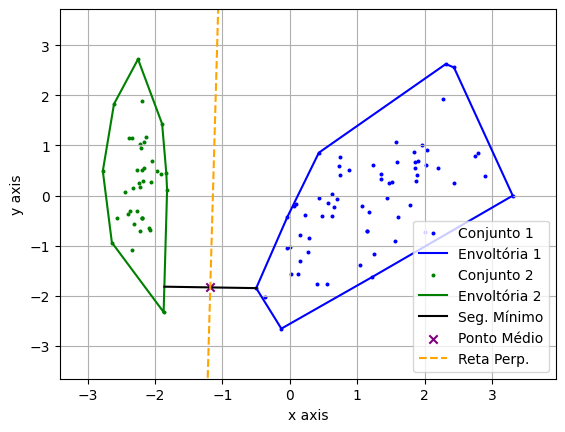

In [392]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/iris.prepared.csv"
default_classification = "Iris-setosa" # se é iris-setosa ou não... isso que iremos classificar!

iris = load_dataset(dataset_url, default_classification)

run_classifier(iris)

### Confuso

não usar

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = 7.8919535678295905x + -32.7922093236294
Precisão: 0.0
Revocação: 0.0
F1-score: 0.0


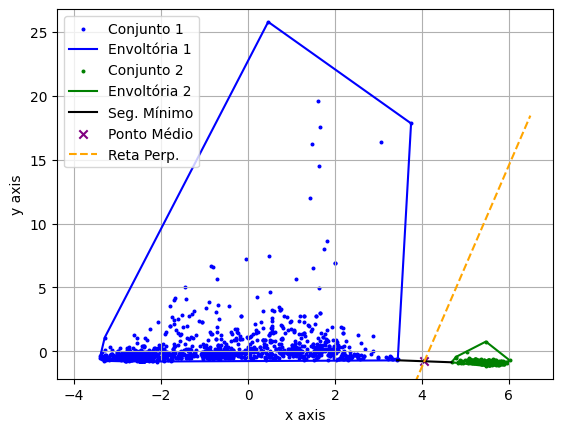

In [393]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/segment.prepared.csv"
default_classification = 2

segment = load_dataset(dataset_url, default_classification)

run_classifier(segment)

###Meritocracia

em alguns casos diz que as envoltórias se interceptam, outros que não. estranho.

Interseção de envoltórias acontece: não é linearmente separável


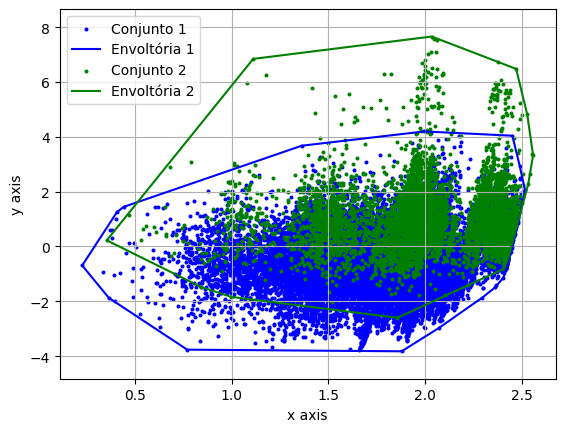

In [394]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/adult.prepared.csv"
default_classification = ">50K"

adult = load_dataset(dataset_url, default_classification)

run_classifier(adult)

### Breast Cancer

Interseção de envoltórias acontece: não é linearmente separável


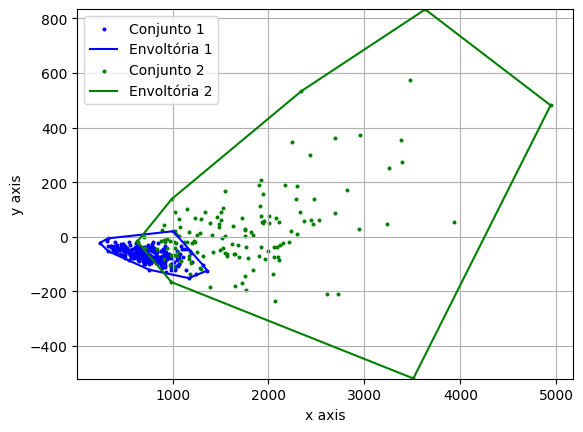

In [395]:
dataset_url = "https://raw.githubusercontent.com/mateuskrause/keel-sklearn-csv/master/sklearn_classification/breast_cancer.csv"
default_classification = 0

breast_cancer = load_dataset(dataset_url, default_classification)

run_classifier(breast_cancer)

### Digits

esse dataset é muito estranho. pode ocorrer de uma envoltória estar dentro da outra e dizer que é separável. não usar, principalmente porque ele nao faz muito sentido.

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -5.408047907805151x + 195.7367142786926
Precisão: 0.10555555555555556
Revocação: 1.0
F1-score: 0.19095477386934673


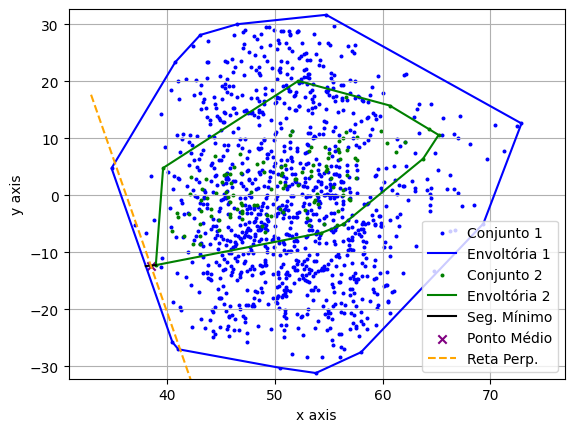

In [396]:
dataset_url = "https://raw.githubusercontent.com/mateuskrause/keel-sklearn-csv/master/sklearn_classification/digits.csv"
default_classification = 0

digits = load_dataset(dataset_url, default_classification)

run_classifier(digits)

### Wine

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = 0.0433355825979044x + -35.02987582493565
Precisão: 0.7692307692307693
Revocação: 0.6666666666666666
F1-score: 0.7142857142857142


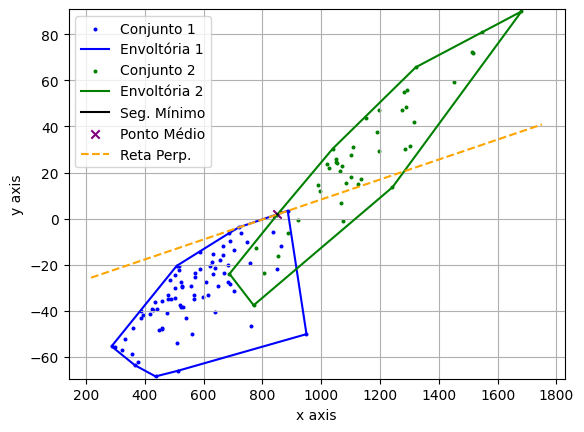

In [397]:
dataset_url = "https://raw.githubusercontent.com/mateuskrause/keel-sklearn-csv/master/sklearn_classification/wine.csv"
default_classification = 0

wine = load_dataset(dataset_url, default_classification)

run_classifier(wine)

### Apendicitis

Interseção de envoltórias acontece: não é linearmente separável


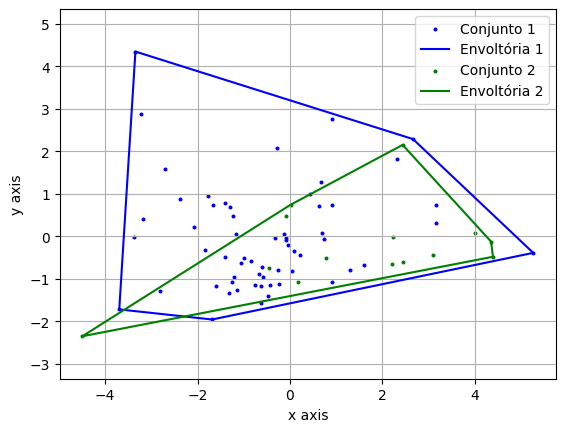

In [398]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/appendicitis.prepared.csv"
default_classification = 1

appendicitis = load_dataset(dataset_url, default_classification)

run_classifier(appendicitis)

### Australian

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -15.234332611938479x + 36.048441098963146
Precisão: 1.0
Revocação: 0.010752688172043012
F1-score: 0.021276595744680854


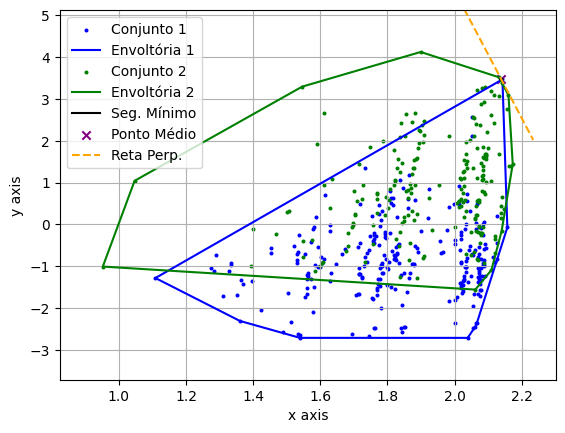

In [399]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/australian.prepared.csv"
default_classification = 1

australian = load_dataset(dataset_url, default_classification)

run_classifier(australian)

### Bands

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = 0.9991462645300355x + 3.4997946384988583
Precisão: 0.0
Revocação: 0.0
F1-score: 0.0


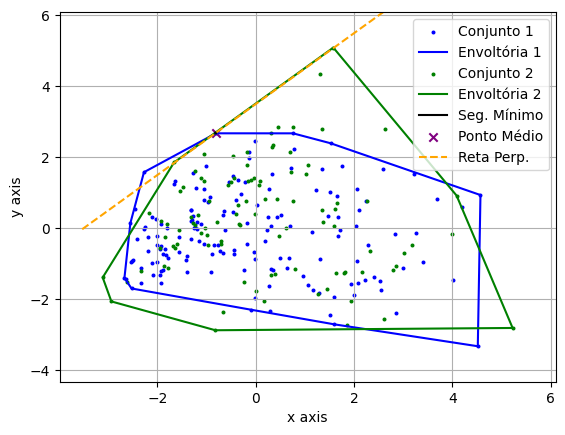

In [400]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/bands.prepared.csv"
default_classification = "band"

bands = load_dataset(dataset_url, default_classification)

run_classifier(bands)

### Galo

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -0.8211823624136564x + 0.4786959668397561
Precisão: 0.4318181818181818
Revocação: 1.0
F1-score: 0.6031746031746031


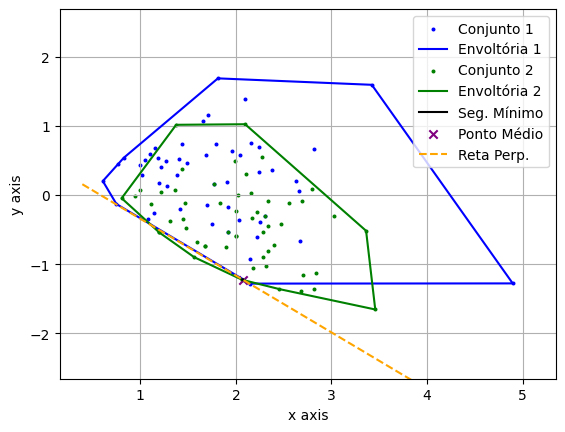

In [401]:
dataset_url = "https://drive.google.com/uc?id=1Meh9LcRo_melHMboKZ4Z_xQNgK2n1YQo"
default_classification = 1

galo = load_dataset(dataset_url, default_classification)

run_classifier(galo)

### Dermatology



Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -1.0679148402130185x + 1.3033681940407849
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


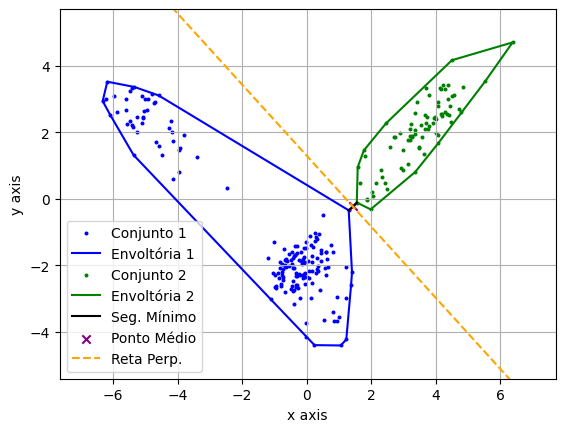

In [402]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/dermatology.prepared.csv"
default_classification = 1

galo = load_dataset(dataset_url, default_classification)

run_classifier(galo)

### Lymphography

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -13.47388381961226x + 28.191592232534898
Precisão: 0.0
Revocação: 0.0
F1-score: 0.0


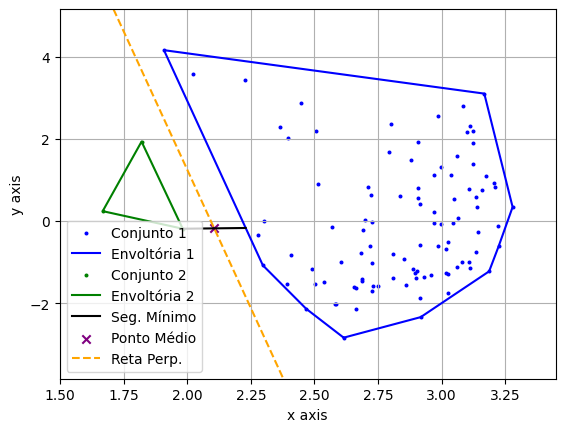

In [403]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/lymphography.prepared.csv"
default_classification = "fibrosis"

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### New Thyroid

Interseção de envoltórias acontece: não é linearmente separável


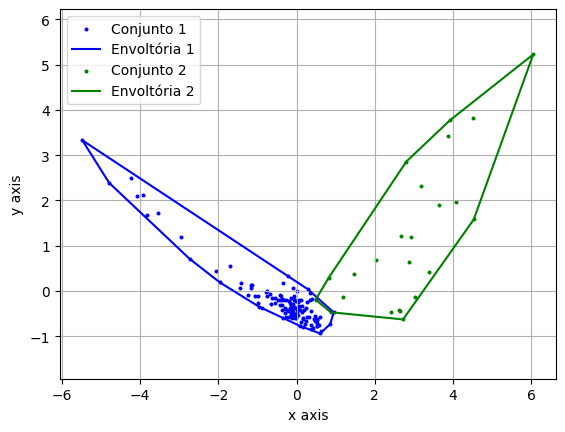

In [421]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/newthyroid.prepared.csv"
default_classification = 3

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### Zoo

Envoltórias não interceptam: é linearmente separável
Equação da reta perpendicular: y = -0.251071102177776x + 0.7918212734149053
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


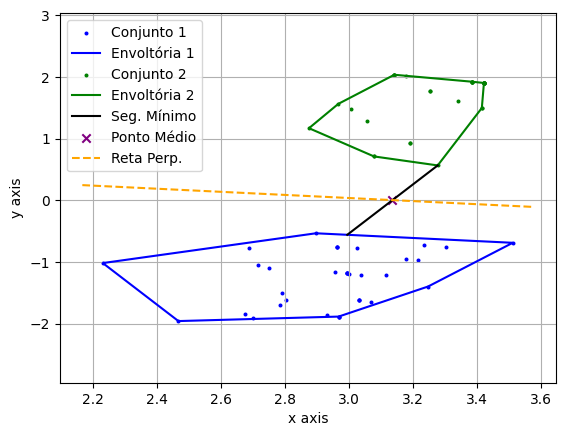

In [405]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/zoo.prepared.csv"
default_classification = 1

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)